In [1]:
import pandas as pd
import numpy as np

In [2]:
#讀取 'glass.csv' 成為 DataFrame glassdf
glassdf = pd.read_csv('glass.csv')

In [3]:
glassdf.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
#資料預處理及準備訓練資料 
#裁取特徵屬性
X=glassdf.loc[:,'RI':'Fe']
#target y
y=glassdf['Type']

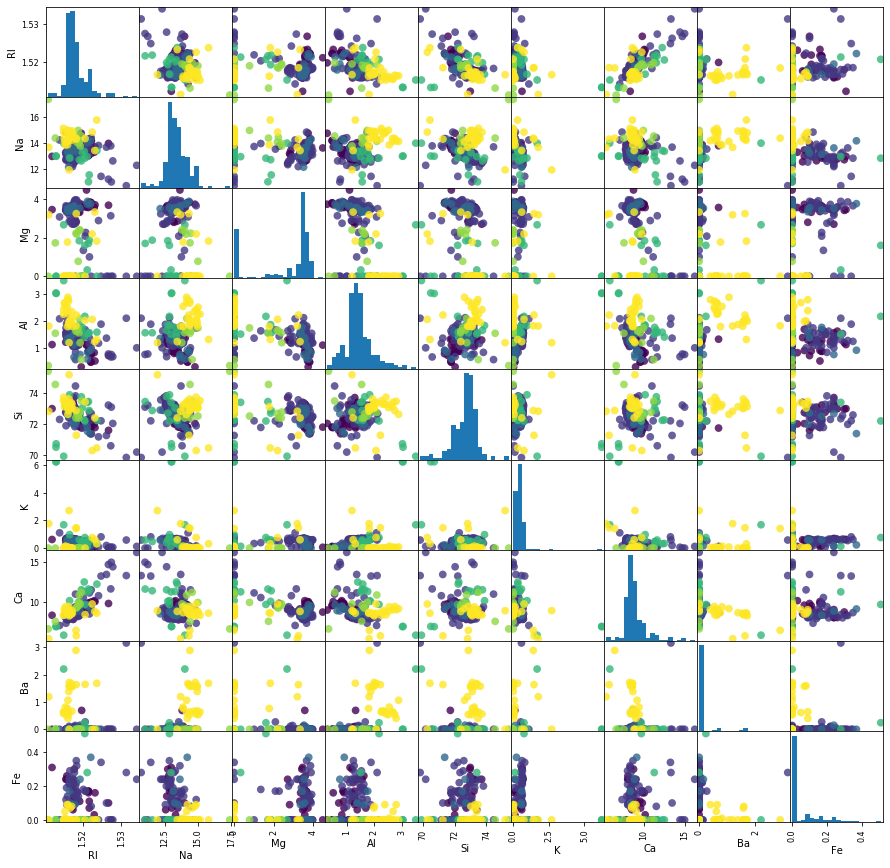

In [5]:
#以視覺化(圖形)做EDA
import matplotlib.pyplot as plt
%matplotlib inline

grr=pd.plotting.scatter_matrix(X,c=y.values, figsize=(15,15),marker='o',
                     hist_kwds={'bins':20},s=60,alpha=0.8)

In [6]:
#訓練和測試資料, 使用scikit-larn train_test_split()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,random_state=0)

print('X_train.shape=',X_train.shape,' y_train.shape=',y_train.shape)
print('X_test.shape=',X_test.shape,' y_test.shape=',y_test.shape)

X_train.shape= (160, 9)  y_train.shape= (160,)
X_test.shape= (54, 9)  y_test.shape= (54,)


In [7]:
#建立模型 -決策樹(Decision Tree)
#匯入 DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

#建立一個 DecisionTreeClassifier object 'tree01', random_state 亂數種子
tree01=DecisionTreeClassifier(random_state=0)

#訓練模型
treeModel01=tree01.fit(X_train,y_train)

#使用訓練資料集驗證treeModel01
treeModel01.score(X_train,y_train)
#auc=1.0, 100%完全命中

1.0

In [8]:
#改用測試資料集驗證
treeModel01.score(X_test,y_test)

0.6111111111111112

In [9]:
#預測,以X_test[0], 並以y_test[0] 對答案
#使用訓練完成的模型, 對相同資料型態的特徵資料做預測
X_test[0] 

array([ 1.51727, 14.7    ,  0.     ,  2.34   , 73.28   ,  0.     ,
        8.95   ,  0.66   ,  0.     ])

In [10]:
X_test[0].shape

(9,)

In [11]:
#資料維度不同，需要做reshape
X_new=X_test[0].reshape(1,-1)
X_new.shape

(1, 9)

In [12]:
#將reshape後的資料點 X_new 丟給Model 'treeModel01'做預測
treeModel01.predict(X_new)

array([7], dtype=int64)

In [13]:
#以 y_test[0] 對答案
y_test[0]

7

In [14]:
#預測新收集的的玻璃樣本
#以我們建立的模型預測判定此樣本種類:
sample_01=[1.515,13.5,4,1.3,72.6,0.45,9,0.3,0]
#將list轉為shape:(1,9) 的 ndarray
new_array_01=np.array(sample_01).reshape(1,-1)
#以treeModel01做預測
prediction_01=treeModel01.predict(new_array_01)

prediction_01

array([3], dtype=int64)

In [15]:
prediction_01[0]

3

In [16]:
#預測種類為3

In [17]:
#以zip編一個玻璃種類名稱字典 "dict_glass"
dict_glass={no:name for no,name 
           in zip(range(0,6),['building_windows_float_processed','building_windows_non_float_processed','vehicle_windows_float_processed','containers','tableware','headlamps'])}

In [18]:
#印出預測的玻璃種類
print("玻璃成分:")
print("RI:",sample_01[0]," Na:",sample_01[1],
     "Mg:",sample_01[2]," Al:",sample_01[3],"Si:",sample_01[4],"K:",sample_01[5],"Ca:",sample_01[6],"Ba:",sample_01[7],"Fe:",sample_01[8],"\n")
print("預測種類是:",dict_glass[prediction_01[0]])

玻璃成分:
RI: 1.515  Na: 13.5 Mg: 4  Al: 1.3 Si: 72.6 K: 0.45 Ca: 9 Ba: 0.3 Fe: 0 

預測種類是: containers


In [19]:
#評估模型準確率
#以test dataset X_test 給模型做預測,預測值存於 y_pred
y_pred=treeModel01.predict(X_test)

In [20]:
#檢視 y_pred (預測)
y_pred

array([7, 1, 2, 2, 5, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 7, 3, 2, 1, 2, 5, 1,
       7, 5, 1, 1, 7, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 3, 1, 7, 5, 6, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 6, 7, 3], dtype=int64)

In [21]:
#檢視 y_test (標準答案)
y_test

array([7, 1, 2, 6, 5, 2, 2, 2, 1, 2, 1, 2, 3, 2, 2, 7, 2, 1, 3, 3, 5, 2,
       7, 7, 2, 1, 7, 1, 2, 2, 1, 1, 2, 2, 2, 3, 1, 3, 2, 7, 2, 6, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 7, 1], dtype=int64)

In [22]:
#使用 model.score() 計算
treeModel01.score(X_test,y_test)

0.6111111111111112

In [23]:
#隨機森林
#載入scikit-learn 中 RandomForestClassifier module
from sklearn.ensemble import RandomForestClassifier

#以() RandomForestClassifier建立一個100棵樹的隨機森林'forest100'
forest100=RandomForestClassifier(n_estimators=100,random_state=0)

#以 train dataset (X_train,y_train) fit model
forest100.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
#評估隨機森林模型的AUC
print("AUC on training set: {:.3f}".format(forest100.score(X_train,y_train)))
print("AUC on test set: {:.3f}".format(forest100.score(X_test,y_test)))

AUC on training set: 1.000
AUC on test set: 0.704


In [25]:
#比較前面單一棵樹的AUC
from sklearn.tree import DecisionTreeClassifier
tree01=DecisionTreeClassifier(random_state=0)
tree01.fit(X_train,y_train)
print("AUC on training set: {:.3f}".format(tree01.score(X_train,y_train)))
print("AUC on training set: {:.3f}".format(tree01.score(X_test,y_test)))

AUC on training set: 1.000
AUC on training set: 0.611


In [26]:
#以forest100做預測，與單一決策樹模型得到的結果相同，皆為種類 3 (containers)
prediction_01=forest100.predict(new_array_01)
prediction_01[0]

3